links
<br>For colormaps and colorbars
<br>    - https://matplotlib.org/stable/tutorials/colors/colormaps.html
<br>    - https://matplotlib.org/3.2.2/gallery/userdemo/colormap_normalizations_diverging.html
<br>For projections
<br>    - https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
<br>For features
<br>    - https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
<br>How to get pcolormesh with levels (but didn't work)
<br>    - https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolormesh_levels.html
    

In [1]:
import cartopy.util
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

#########################################
<br>Plot 2m temperature for Europe alakeGLAC
<br>#########################################

[-14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.
  14.  16.  18.  20.  22.  24.  26.]


/home/csys/ukrebska/.conda/envs/lilly-paper/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'interpolation'
  result = super().contour(*args, **kwargs)


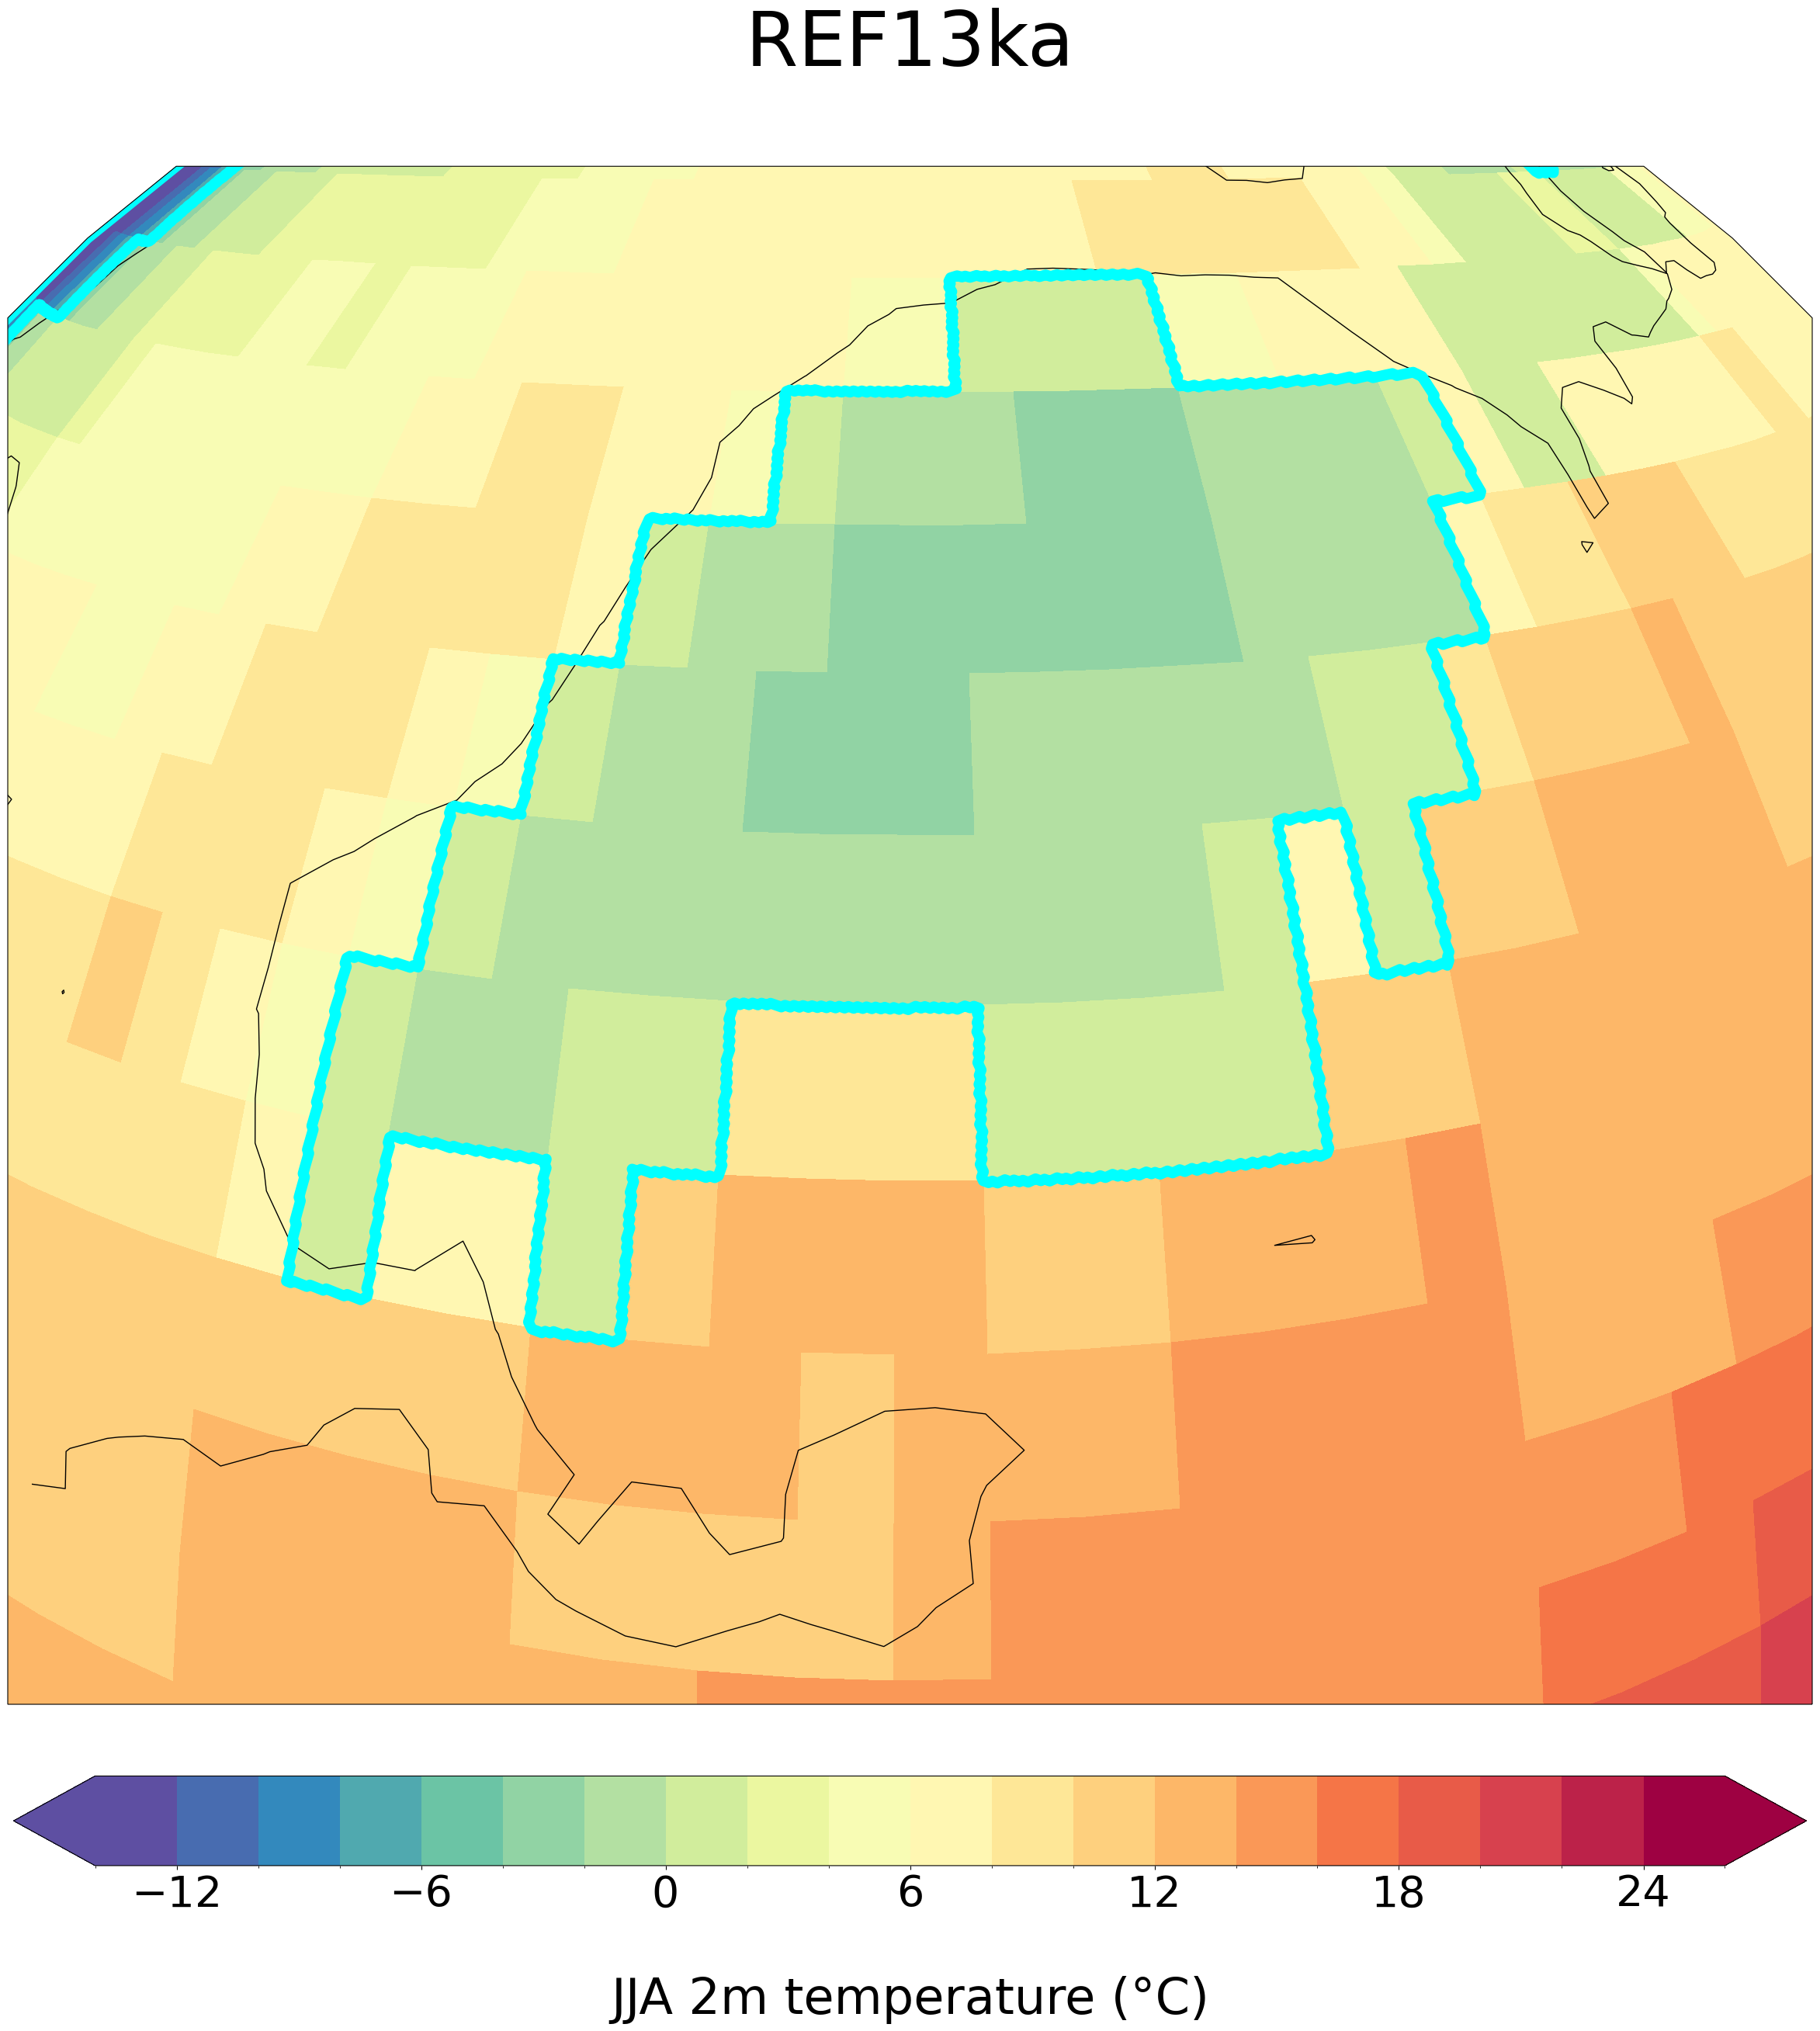

In [4]:
#read data
GLACL='../data/100ymean_alakeGLAC_temp2_JJA_2250_2349.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='../data//bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='../data/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)


############################################
# create plot                              #
############################################


def makePlot(evar, clon, clat, extent, label):

    #Variable from alakeGLAC simulation (defined below)
    varg=GLACL_data.variables[evar][0,:,:]
    lats=GLACL_data.variables['lat'][:] 
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    
    
    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adds charts to figure
    g01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=700_000)) 
    
    #sets the extent
    g01.set_extent(extent)
    
    #needed for colormap with 0 in the middle
    divnorm = mcolors.TwoSlopeNorm(vmin=level_min, vcenter=0, vmax=level_max)
    
    #needed for levels in contour
    #https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.MaxNLocator
    #slm_lev=mticker.MaxNLocator(nbins=2,steps=[1,2],integer=True)
    
    #for better arrangement (less white space)
    #fig_gp.tight_layout()
    
    #for removing white space at 0 meridian when plotting echam6 data
    cyclic_datag, cyclic_lon = cartopy.util.add_cyclic_point(varg, coord=lons) 
    
    
    ################################
    #create JJA for alakeGLAC      #
    ################################
    
    #Old version
    #g01_fill=g01.pcolormesh(lons, lats, varg-273.15,
    #                        transform=ccrs.PlateCarree(),
    #                        edgecolor="none",
    #                        cmap="Spectral_r",
    #                        vmin=level_min,                           
    #                        vmax=level_max,
    #                        norm=divnorm,
    #                       )
    
    #The following works with discrete colorbar, but has shitty ticks and no 0 in the middle
    bounds=np.linspace(level_min, level_max, 21)
    print(bounds)
    
    norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)
    
    g01_fill=g01.pcolormesh(lons, lats, varg-273.15,
                            transform=ccrs.PlateCarree(),
                            norm=norm,
                            cmap="Spectral_r"
                           )

    
    g01_cbar=plt.colorbar(g01_fill, ax=g01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    g01_slm=g01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        interpolation="none", #why doesn't it affect plot??
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                        )        
    g01_gla=g01.contour(lons5, lats5, glac,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="cyan",
                        linewidths=10,
                        linestyles=["-"],
                       )
    g01.set_title(" REF13ka \n"
                  "",
                  fontsize=70
                 )
    g01_cbar.ax.tick_params(labelsize=40)
    g01_cbar.set_label(label, fontsize=46)
    
    fig_gp.savefig('../FIGS/Fig1_1.png') 
    
    return

var_extent= [0,40,52,73]
level_min=259.15-273.15
level_max=299.15-273.15
stepsize=2
var_levels=np.arange(level_min,level_max,stepsize)
season="JJA"

makePlot(evar='temp2', 
         clon=20,
         clat=60, 
         extent=var_extent,
         label = "\n"+season+" 2m temperature (°C)"
        )


#########################################
<br>Plot 2m temperature anomaly for Europe
<br>#########################################

-12.721039 1.1534882


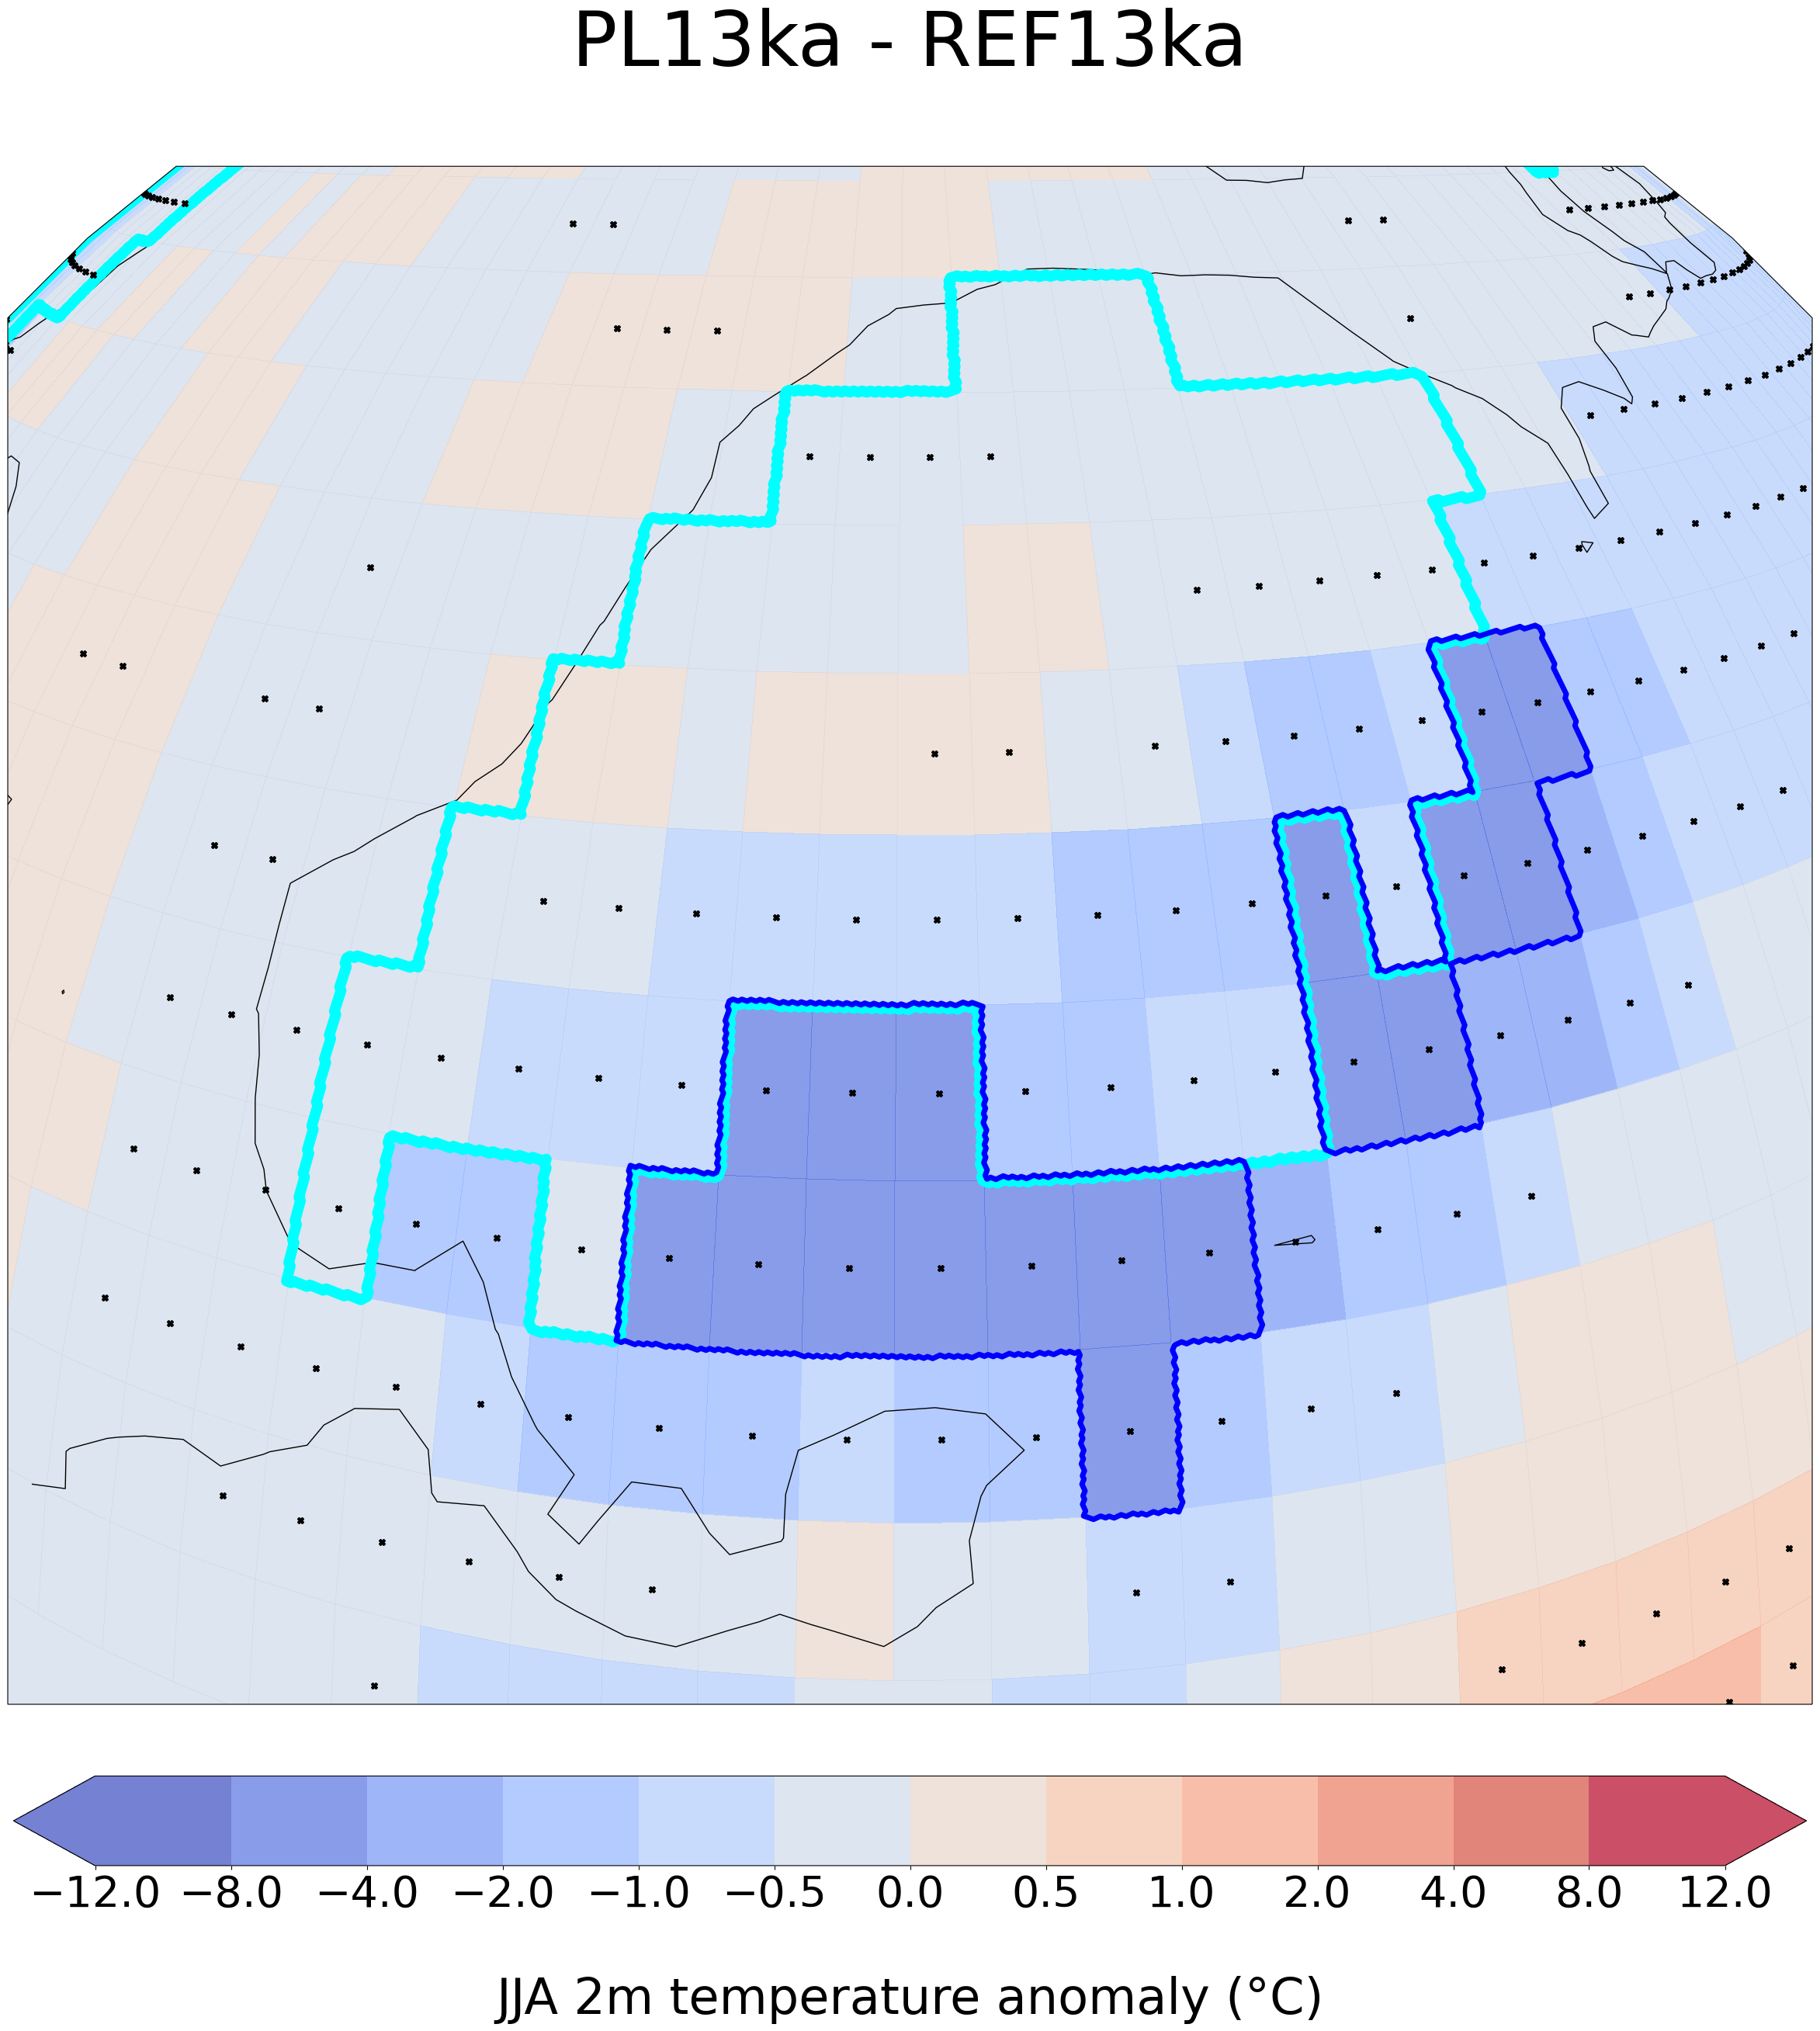

In [5]:
#read data

PLAKE='../data/100ymean_plake_temp2_JJA_2250_2349.nc'
PLAKE_data=netcdf_dataset(PLAKE)
GLACL='../data/100ymean_alakeGLAC_temp2_JJA_2250_2349.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='../data/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='../data/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

PSIG='../data/PL_SigMaskSM.nc'
PSIG_data=netcdf_dataset(PSIG)

############################################
# create plot                              #
############################################


def makePlot(evar, clon, clat, extent, label):

    #Variable from alakeGLAC simulation (defined below)
    varp=PLAKE_data.variables[evar][0,:,:]
    varg=GLACL_data.variables[evar][0,:,:]
    lats=GLACL_data.variables['lat'][:] 
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    #significance mask
    vsigp=PSIG_data.variables['temp_maskJJA'][:,:] 

    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adds charts to figure
    p01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=700_000)) 
    
    #sets the extent
    p01.set_extent(extent)
    
    
    ####################################
    #create anomaly for plake-alakeGLAC#
    #################################### 
    
    
  
    bounds=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12)

    #print(bounds)
    a=np.amin(varp-varg)
    b=np.amax(varp-varg)
    print(a,b)
    p01_fill=p01.pcolormesh(lons, lats, varp-varg,
                            transform=ccrs.PlateCarree(),
                            norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256),
                            cmap="coolwarm",
                            alpha=0.7,
                            edgecolor="none"
                           )

    
    p01_cbar=plt.colorbar(p01_fill, ax=p01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    p01_slm=p01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                        )        
    p01_gla=p01.contour(lons5, lats5, glac,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="cyan",
                        linewidths=10,
                        linestyles=["-"],
                        )  
    p01_plk=p01.contour(lons5, lats5, plake,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="blue",
                        linewidths=5,
                        linestyles=["-"],
                        #linestyles=["-."],
                        )
    for idx, lon_val in enumerate(lons):
        for idy, lat_val in enumerate(lats):
            if (vsigp[idy, idx]==0):
                p01.plot(lon_val, lat_val, 'kX',
                        transform=ccrs.PlateCarree())
    
    
    p01.set_title(" PL13ka - REF13ka \n"
                  "",
                  fontsize=70
                 )
    p01_cbar.ax.tick_params(labelsize=40)
    p01_cbar.set_label(label, fontsize=46)
    p01_cbar.set_ticks(ticks=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12))
    
    fig_gp.savefig('../FIGS/Fig1_2.png')

    
    return

var_extent= [0,40,52,73]
level_min=-15
level_max=15
stepsize=2
var_levels=np.arange(level_min,level_max,stepsize)
season="JJA"


makePlot(evar='temp2', 
         clon=20,
         clat=60, 
         extent=var_extent,
         label = "\n"+season+
                 " 2m temperature anomaly (°C)"
        )

-12.721039 1.1534882


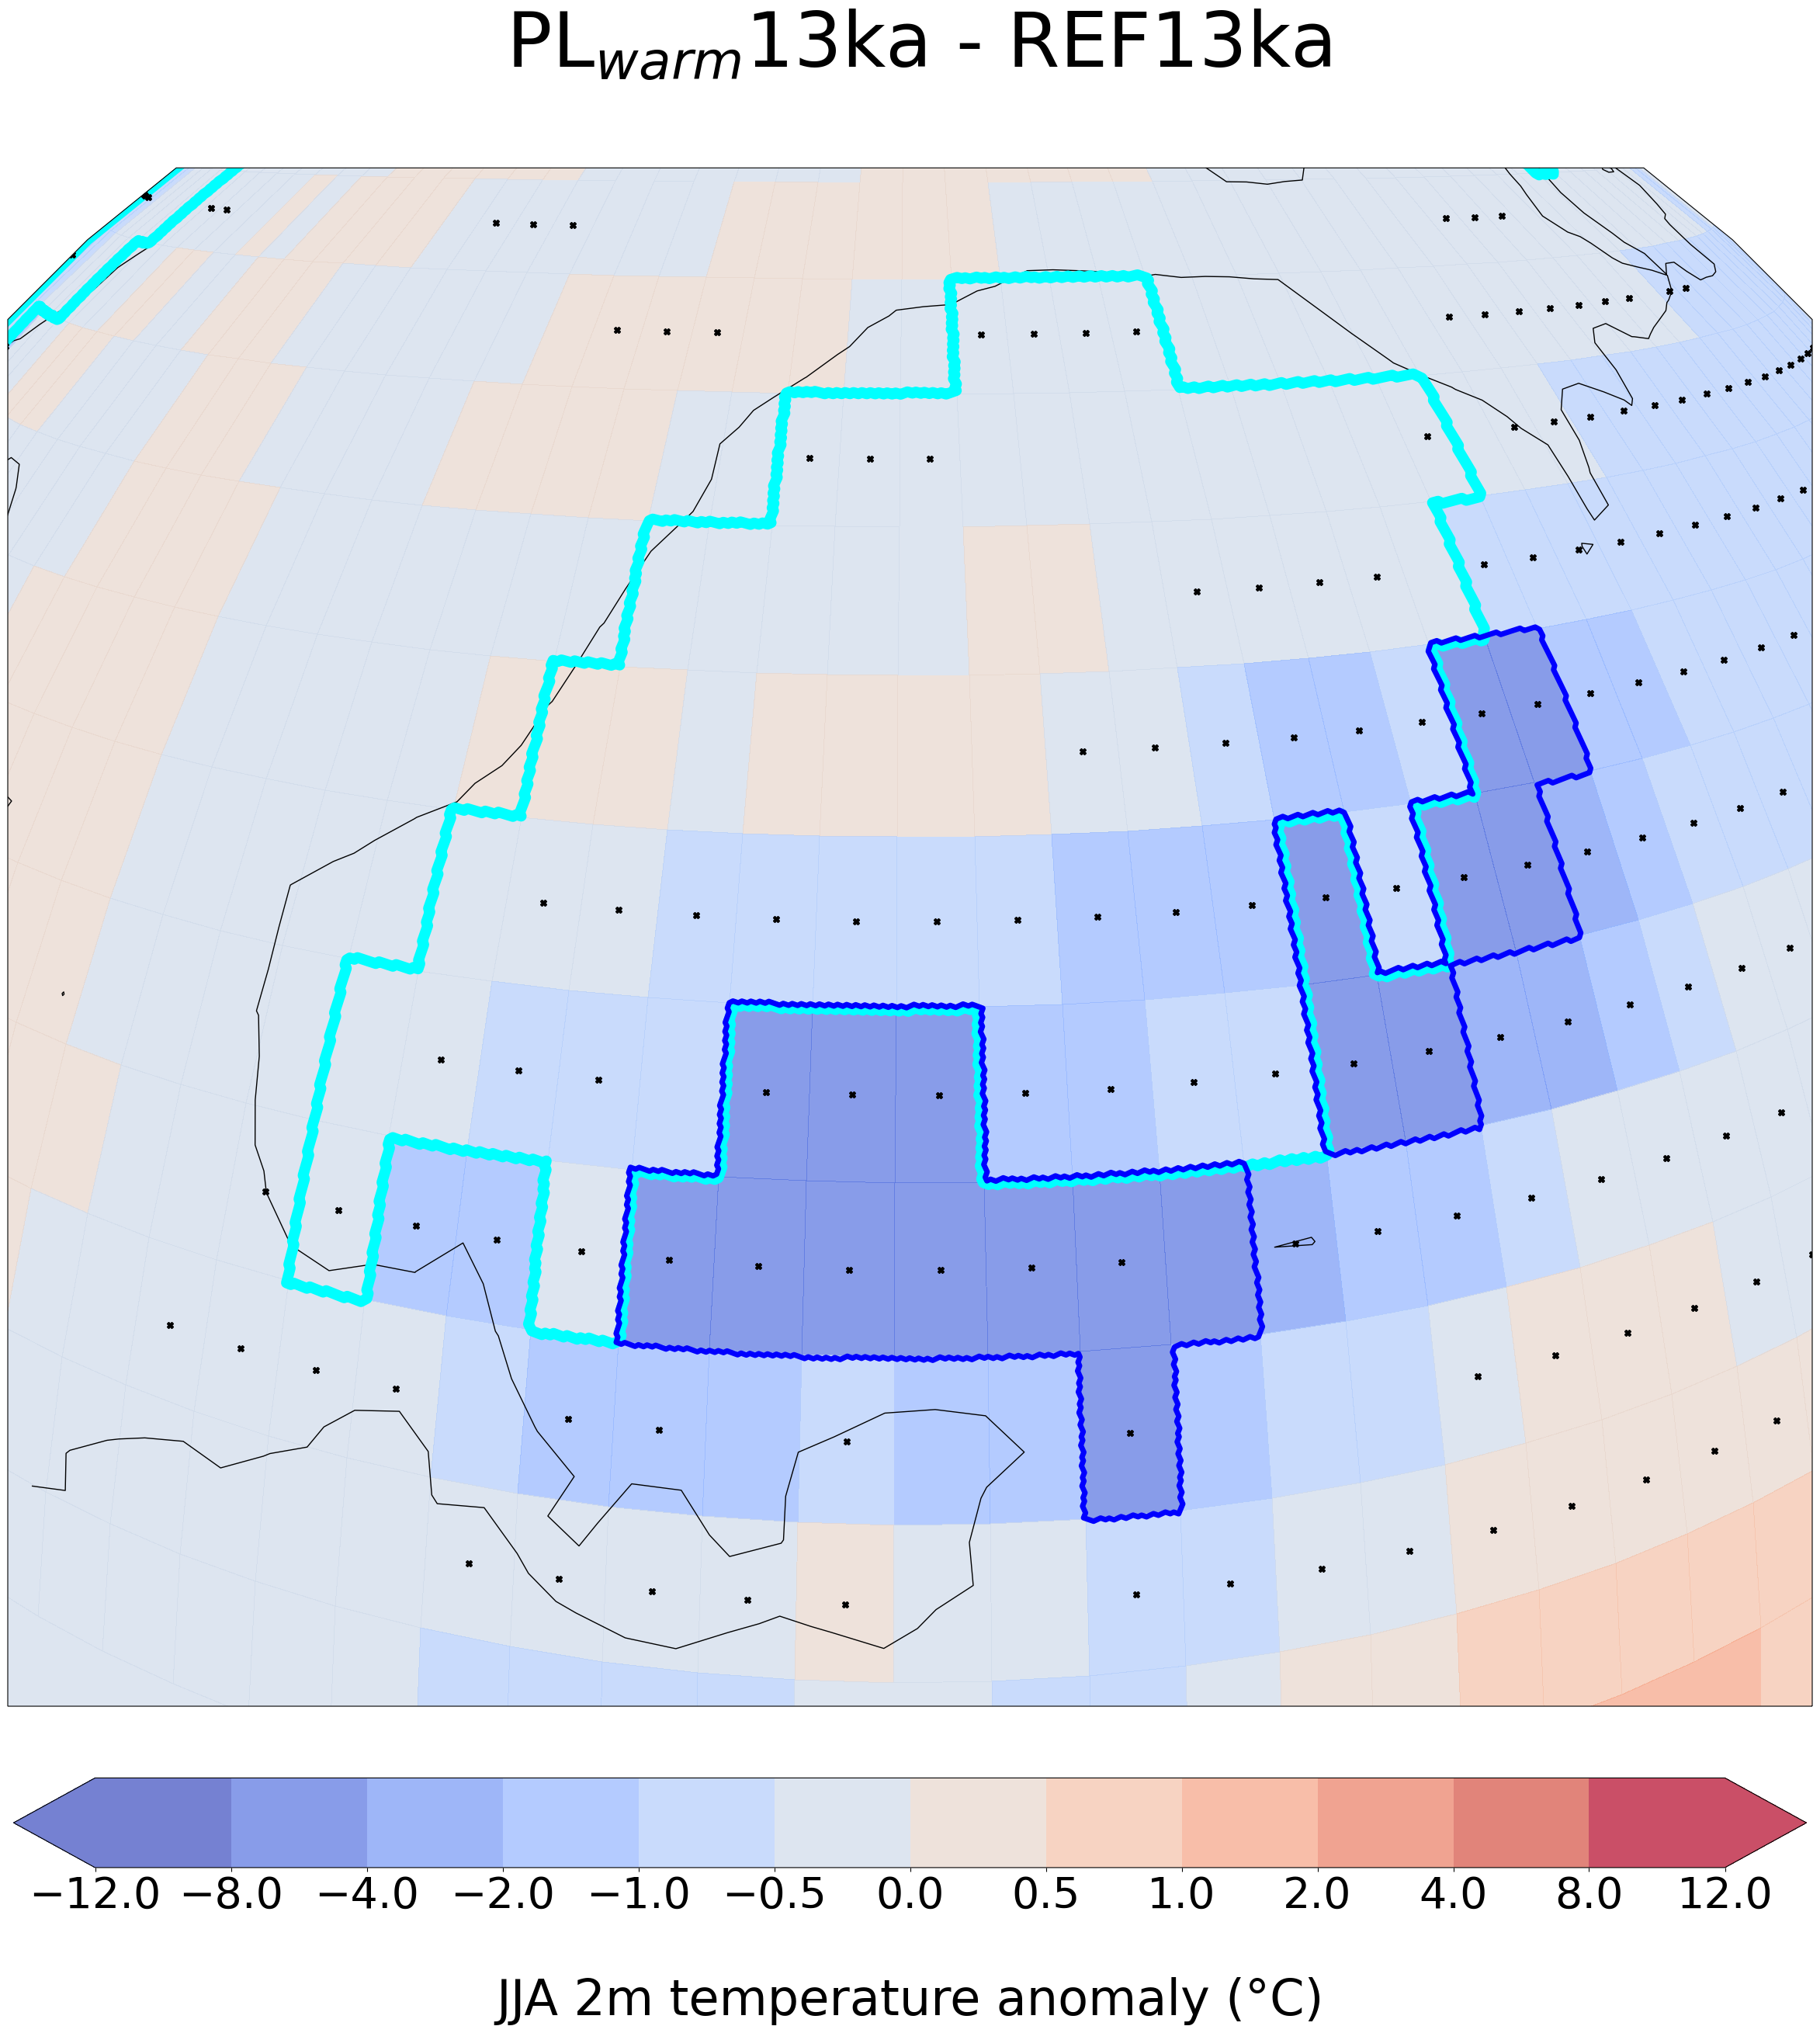

In [8]:
#read data

ALAKE='../data/100ymean_alake13ka_temp2_JJA_2250_2349.nc'
ALAKE_data=netcdf_dataset(PLAKE)
GLACL='../data/100ymean_alakeGLAC_temp2_JJA_2250_2349.nc'
GLACL_data=netcdf_dataset(GLACL)
BC='../data/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='../data/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

PSIG='../data/AL_SigMaskSM.nc'
PSIG_data=netcdf_dataset(PSIG)

############################################
# create plot                              #
############################################


def makePlot(evar, clon, clat, extent, label):

    #Variable from alakeGLAC simulation (defined below)
    varp=ALAKE_data.variables[evar][0,:,:]
    varg=GLACL_data.variables[evar][0,:,:]
    lats=GLACL_data.variables['lat'][:] 
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    #significance mask
    vsigp=PSIG_data.variables['temp_maskJJA'][:,:] 

    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adds charts to figure
    p01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=700_000)) 
    
    #sets the extent
    p01.set_extent(extent)
    
    
    ####################################
    #create anomaly for plake-alakeGLAC#
    #################################### 
    
    
  
    bounds=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12)

    #print(bounds)
    a=np.amin(varp-varg)
    b=np.amax(varp-varg)
    print(a,b)
    p01_fill=p01.pcolormesh(lons, lats, varp-varg,
                            transform=ccrs.PlateCarree(),
                            norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256),
                            cmap="coolwarm",
                            alpha=0.7,
                            edgecolor="none"
                           )

    
    p01_cbar=plt.colorbar(p01_fill, ax=p01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    p01_slm=p01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                        )        
    p01_gla=p01.contour(lons5, lats5, glac,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="cyan",
                        linewidths=10,
                        linestyles=["-"],
                        )  
    p01_plk=p01.contour(lons5, lats5, plake,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="blue",
                        linewidths=5,
                        linestyles=["-"],
                        #linestyles=["-."],
                        )
    for idx, lon_val in enumerate(lons):
        for idy, lat_val in enumerate(lats):
            if (vsigp[idy, idx]==0):
                p01.plot(lon_val, lat_val, 'kX',
                        transform=ccrs.PlateCarree())
    
    
    p01.set_title(" PL$_{warm}$13ka - REF13ka \n"
                  "",
                  fontsize=70
                 )
    p01_cbar.ax.tick_params(labelsize=40)
    p01_cbar.set_label(label, fontsize=46)
    p01_cbar.set_ticks(ticks=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12))
    
    fig_gp.savefig('../FIGS/FigA2_2.png')

    
    return

var_extent= [0,40,52,73]
level_min=-15
level_max=15
stepsize=2
var_levels=np.arange(level_min,level_max,stepsize)
season="JJA"


makePlot(evar='temp2', 
         clon=20,
         clat=60, 
         extent=var_extent,
         label = "\n"+season+
                 " 2m temperature anomaly (°C)"
        )

#########################################
<br>Plot 2m temperature for NA alakeGLAC
<br>#########################################

[-14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.
  14.  16.  18.  20.  22.  24.  26.]


/home/csys/ukrebska/.conda/envs/lilly-paper/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'interpolation'
  result = super().contour(*args, **kwargs)


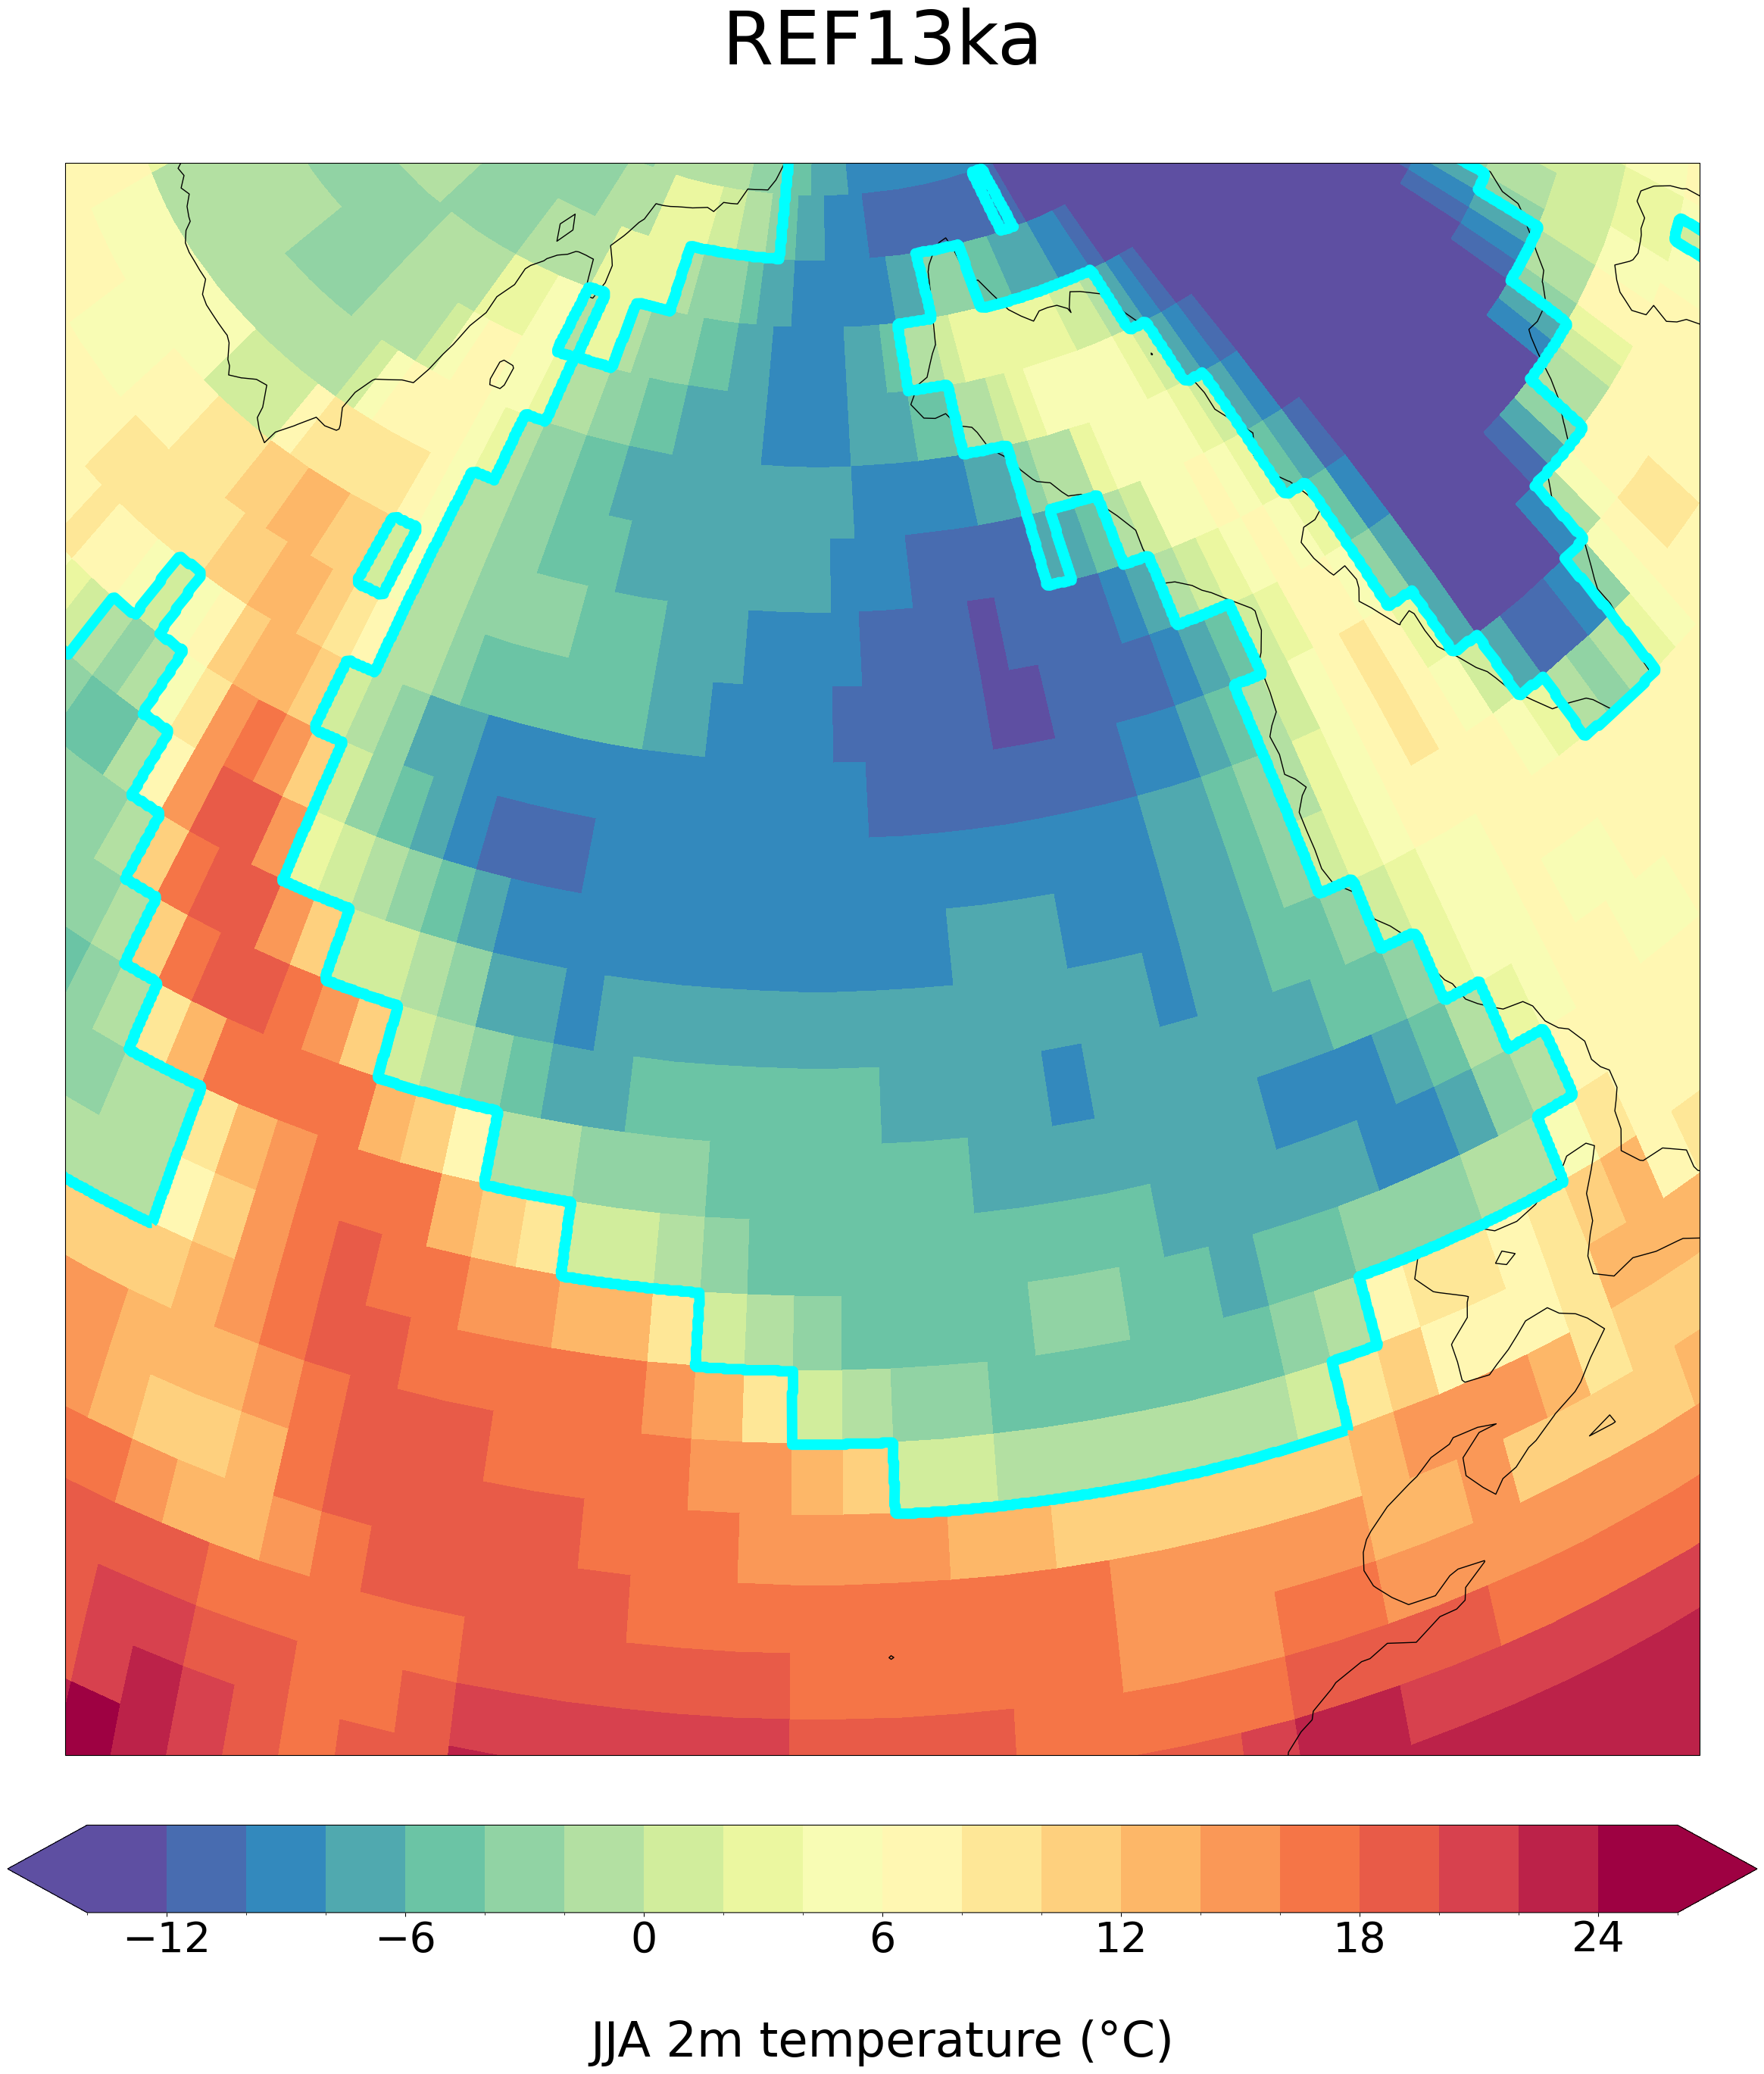

In [9]:
#read data
GLACL='../data/100ymean_alakeGLAC_temp2_JJA_2250_2349.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='../data//bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='../data/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

############################################
# create plot                              #
############################################


def makePlot(evar, clon, clat, extent, label):

    #Variable from alakeGLAC simulation (defined below)
    varg=GLACL_data.variables[evar][0,:,:]
    lats=GLACL_data.variables['lat'][:] 
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    
    

    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adds charts to figure
    g01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=10_000_000)) 
    
    #sets the extent
    g01.set_extent(extent)
    
    #needed for colormap with 0 in the middle
    divnorm = mcolors.TwoSlopeNorm(vmin=level_min, vcenter=0, vmax=level_max)
    
    #for removing white space at 0 meridian when plotting echam6 data
    cyclic_datag, cyclic_lon = cartopy.util.add_cyclic_point(varg, coord=lons) 
    
    
    ################################
    #create JJA for alakeGLAC      #
    ################################
    
    #The following works with discrete colorbar, but has shitty ticks and no 0 in the middle
    bounds=np.linspace(level_min, level_max, 21)
    print(bounds)
    
    norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)
    
    g01_fill=g01.pcolormesh(lons, lats, varg-273.15,
                            transform=ccrs.PlateCarree(),
                            norm=norm,
                            cmap="Spectral_r"
                           )

    
    g01_cbar=plt.colorbar(g01_fill, ax=g01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    g01_slm=g01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        interpolation="none", #why doesn't it affect plot??
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                        )        
    g01_gla=g01.contour(lons5, lats5, glac,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="cyan",
                        linewidths=10,
                        linestyles=["-"]
                        )  
    
    #g01_plk=g01.contour(lons5, lats5, plake,
    #                    transform=ccrs.PlateCarree(),
    #                    levels=[0],
    #                    colors="cornflowerblue",
    #                    linewidths=2,
    #                    linestyles=["-"],
    #                    #linestyles=["-."],
    #                    )
    
    g01.set_title(" REF13ka \n"
                  "",
                  fontsize=70
                 )
    g01_cbar.ax.tick_params(labelsize=40)
    g01_cbar.set_label(label, fontsize=46)
    
    fig_gp.savefig('../FIGS/Fig1_3.png') 
    
    return

var_extent= [-115,-60,35,80]
level_min=259.15-273.15
level_max=299.15-273.15
stepsize=2
var_levels=np.arange(level_min,level_max,stepsize)
season="JJA"

makePlot(evar='temp2', 
         clon=-90,
         clat=60, 
         extent=var_extent,
         label = "\n"+season+" 2m temperature (°C)"
        )

#########################################
<br>Plot 2m temperature anomaly for NA
<br>#########################################

(-12, -8, -4, -2, -1, -0.5, 0, 0.5, 1, 2, 4, 8, 12)
-12.721039 1.1534882


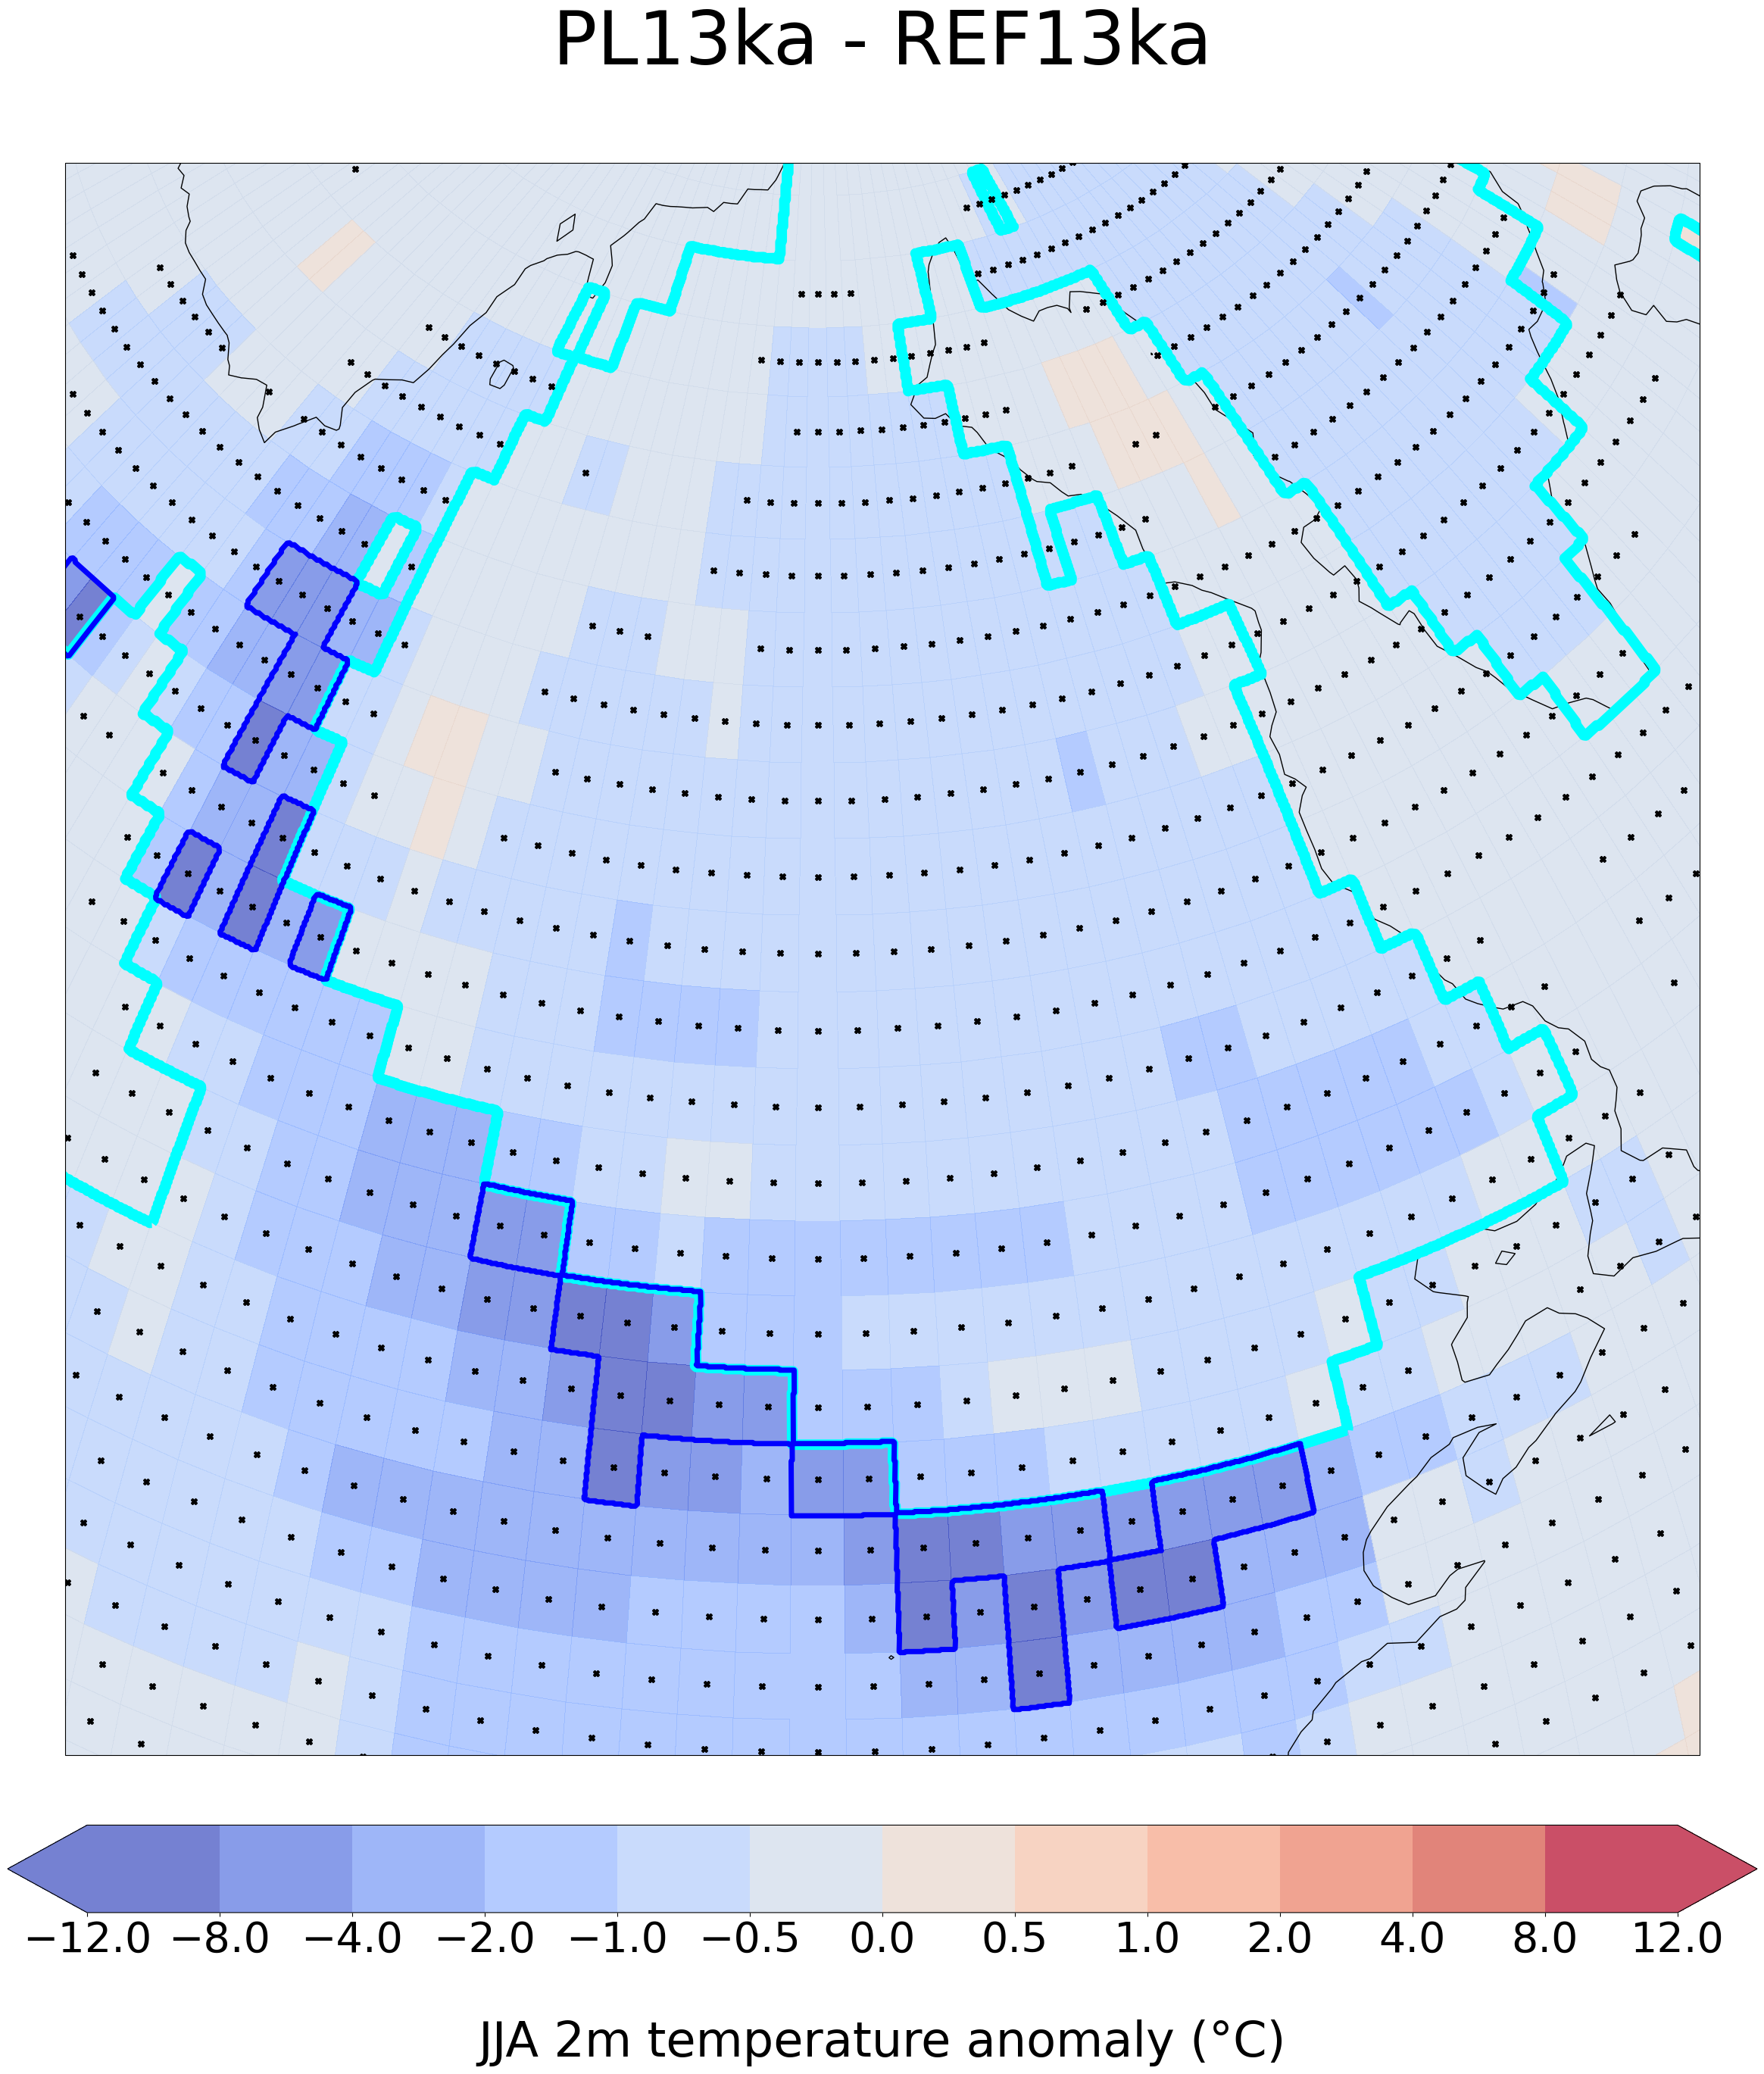

In [12]:
#read data
PLAKE='../data/100ymean_plake_temp2_JJA_2250_2349.nc'
PLAKE_data=netcdf_dataset(PLAKE)
GLACL='../data/100ymean_alakeGLAC_temp2_JJA_2250_2349.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='../data/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='../data/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

PSIG='../data/PL_SigMaskSM.nc'
PSIG_data=netcdf_dataset(PSIG)

############################################
# create plot                              #
############################################


def makePlot(evar, clon, clat, extent, label):

    #Variable from alakeGLAC simulation (defined below)
    varp=PLAKE_data.variables[evar][0,:,:]
    varg=GLACL_data.variables[evar][0,:,:]
    lats=GLACL_data.variables['lat'][:] 
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
     #significance mask
    vsigp=PSIG_data.variables['temp_maskJJA'][:,:] 

    

    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adds charts to figure
    p01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=10_000_000)) 
    
    #sets the extent
    p01.set_extent(extent)
    
    #for colors around 0
    divnorm = mcolors.TwoSlopeNorm(vmin=level_min, vcenter=0, vmax=level_max)
    
    
    ####################################
    #create anomaly for plake-alakeGLAC#
    ####################################
    
    bounds=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12)
    print(bounds)
    a=np.amin(varp-varg)
    b=np.amax(varp-varg)
    print(a,b)
    p01_fill=p01.pcolormesh(lons, lats, varp-varg,
                            transform=ccrs.PlateCarree(),
                            norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256),
                            cmap="coolwarm",
                            alpha=0.7,
                            edgecolor="none"
                           )

    
    p01_cbar=plt.colorbar(p01_fill, ax=p01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    p01_slm=p01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                        )        
    p01_gla=p01.contour(lons5, lats5, glac,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="cyan",
                        linewidths=10,
                        linestyles=["-"],
                        )  
    p01_plk=p01.contour(lons5, lats5, plake,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="blue",
                        linewidths=5,
                        linestyles=["-"],
                        #linestyles=["-."],
                        )
    for idx, lon_val in enumerate(lons):
        for idy, lat_val in enumerate(lats):
            if (vsigp[idy, idx]==0):
                p01.plot(lon_val, lat_val, 'kX',
                          transform=ccrs.PlateCarree())
    p01.set_title(" PL13ka - REF13ka \n"
                  "",
                  fontsize=70
                 )
    p01_cbar.ax.tick_params(labelsize=40)
    p01_cbar.set_label(label, fontsize=46)
    p01_cbar.set_ticks(ticks=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12))
    
    fig_gp.savefig('../FIGS/Fig1_4')

        
    return

var_extent= [-115,-60,35,80]
level_min=-15
level_max=15
stepsize=2
var_levels=np.arange(level_min,level_max,stepsize)
season="JJA"

makePlot(evar='temp2', 
         clon=-90,
         clat=60, 
         extent=var_extent,
         label = "\n"+season+" 2m temperature anomaly (°C)"
        )

(-12, -8, -4, -2, -1, -0.5, 0, 0.5, 1, 2, 4, 8, 12)
-12.721039 1.1534882


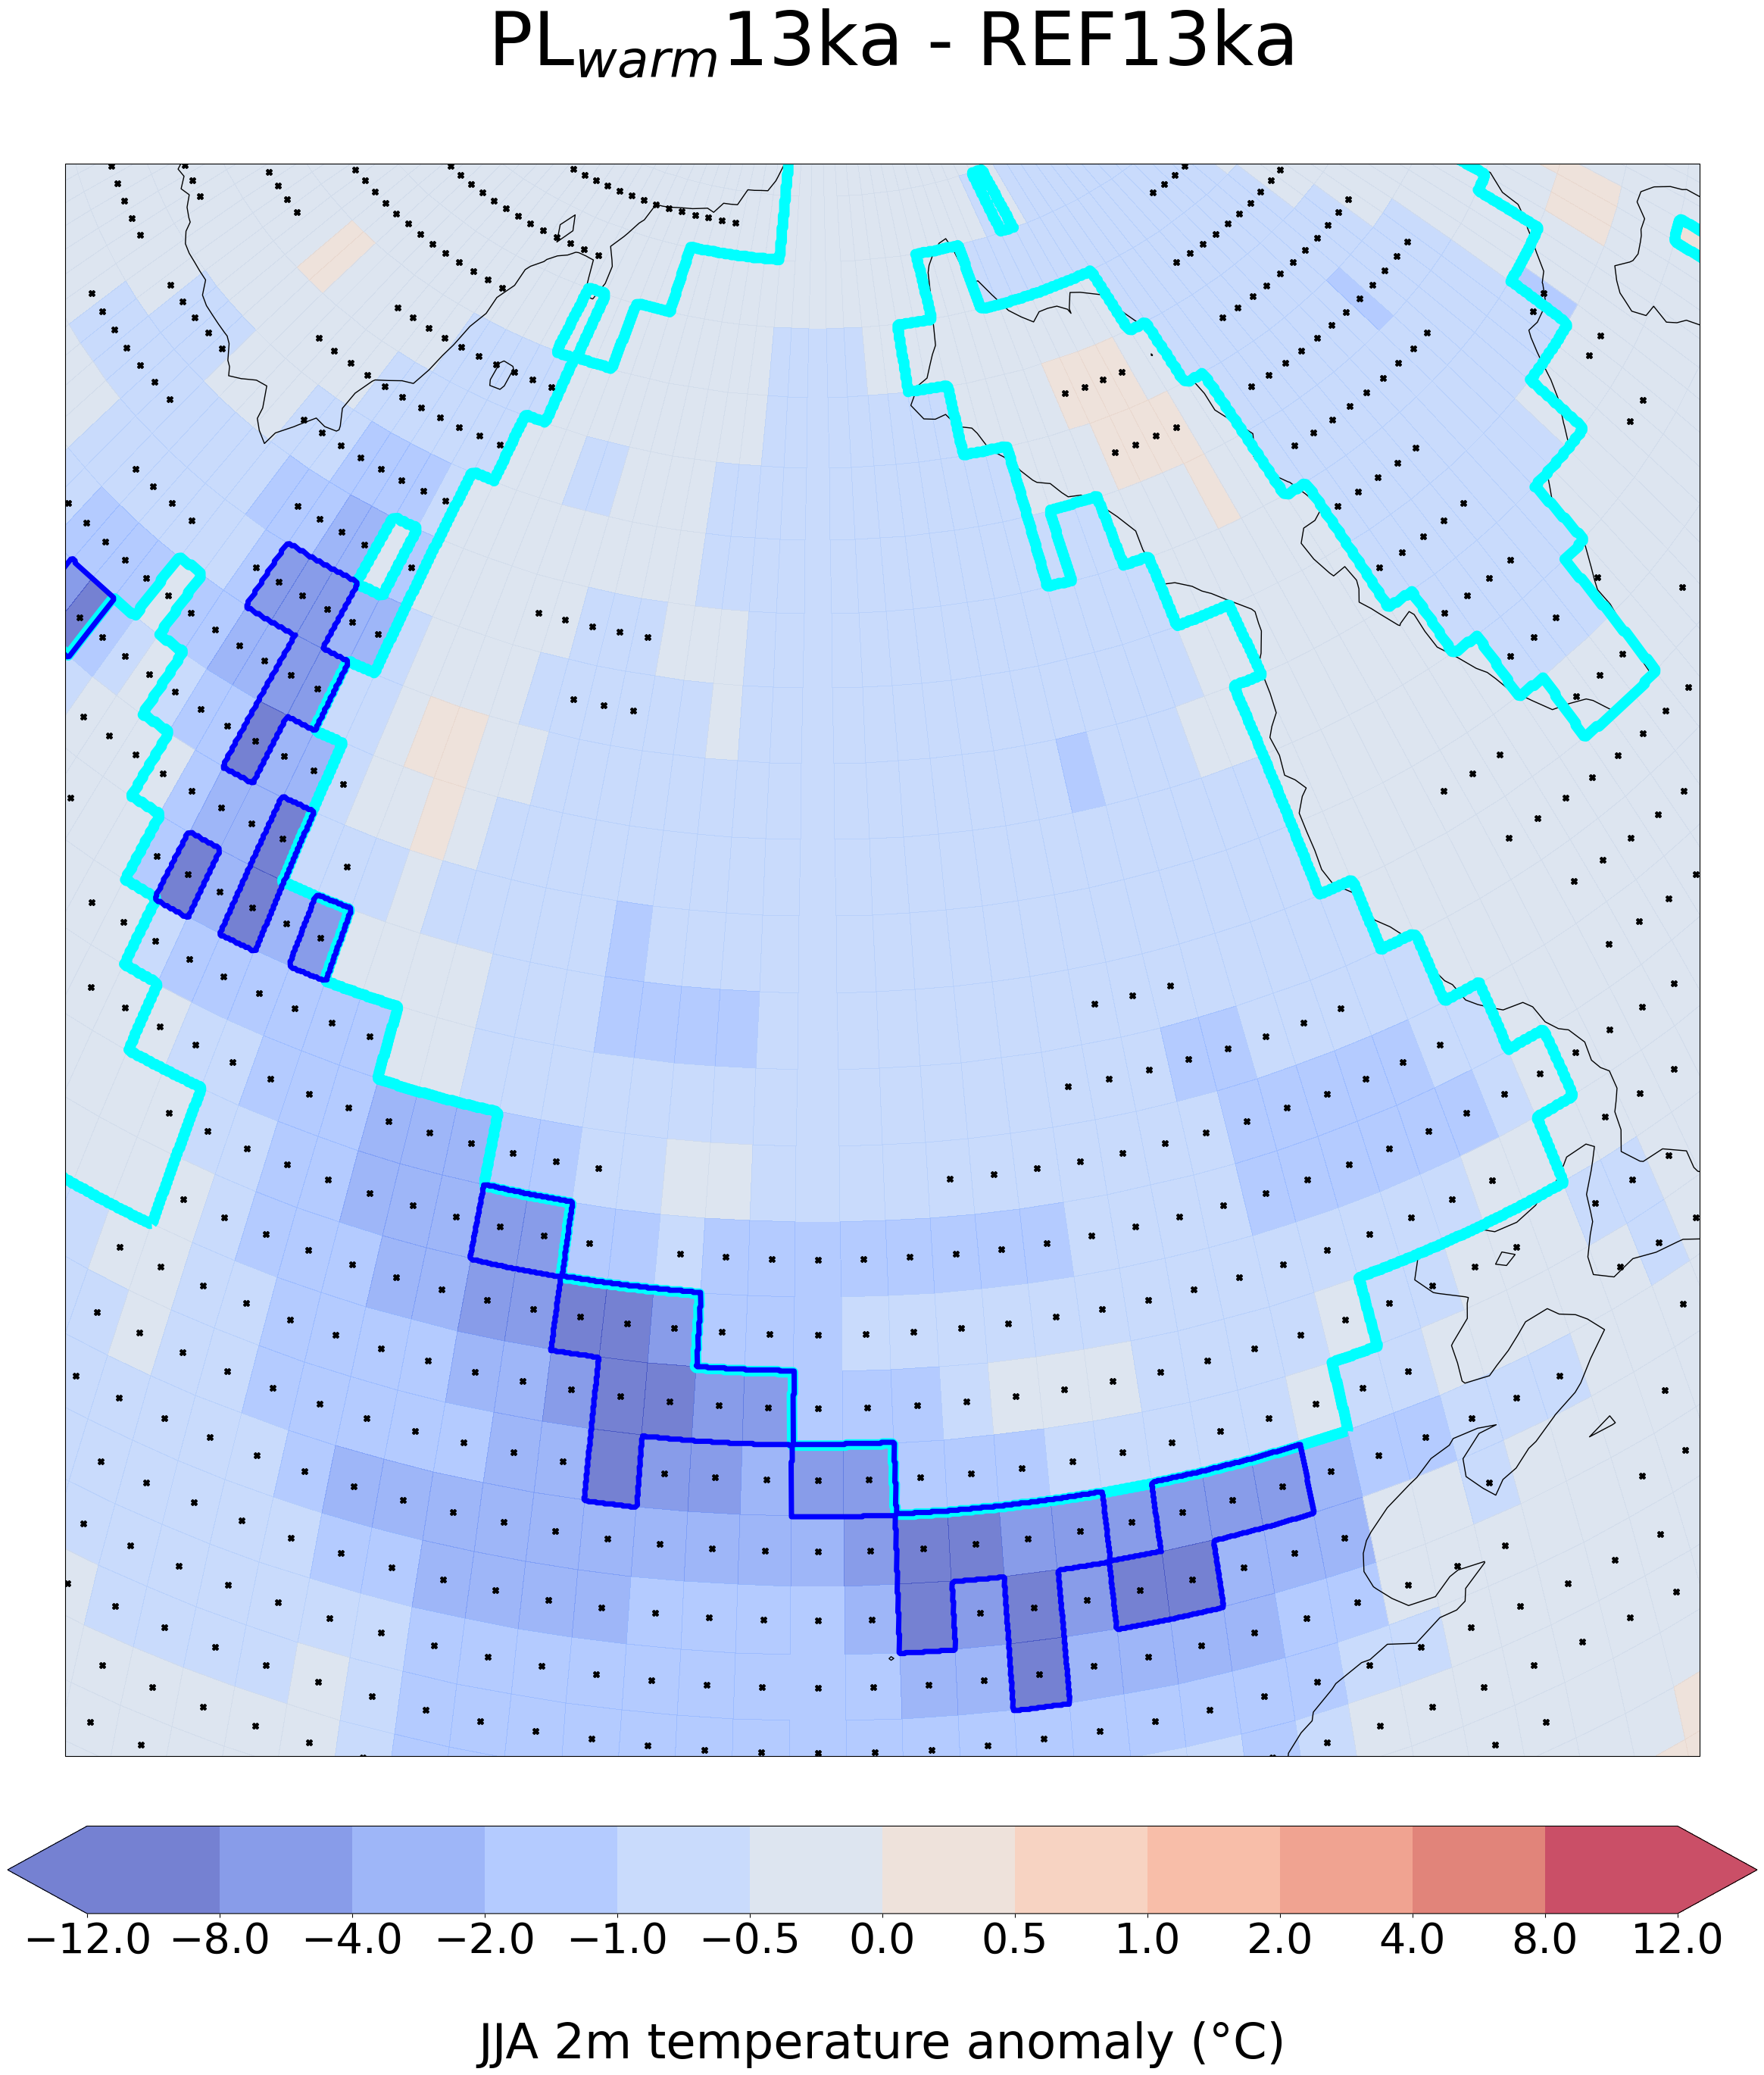

In [14]:
#read data
ALAKE='../data/100ymean_alake13ka_temp2_JJA_2250_2349.nc'
ALAKE_data=netcdf_dataset(PLAKE)
GLACL='../data/100ymean_alakeGLAC_temp2_JJA_2250_2349.nc'
GLACL_data=netcdf_dataset(GLACL)
BC='../data/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='../data/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

PSIG='../data/AL_SigMaskSM.nc'
PSIG_data=netcdf_dataset(PSIG)

############################################
# create plot                              #
############################################


def makePlot(evar, clon, clat, extent, label):

    #Variable from alakeGLAC simulation (defined below)
    varp=ALAKE_data.variables[evar][0,:,:]
    varg=GLACL_data.variables[evar][0,:,:]
    lats=GLACL_data.variables['lat'][:] 
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
     #significance mask
    vsigp=PSIG_data.variables['temp_maskJJA'][:,:] 

    

    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adds charts to figure
    p01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=10_000_000)) 
    
    #sets the extent
    p01.set_extent(extent)
    
    #for colors around 0
    divnorm = mcolors.TwoSlopeNorm(vmin=level_min, vcenter=0, vmax=level_max)
    
    
    ####################################
    #create anomaly for plake-alakeGLAC#
    ####################################
    
    bounds=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12)
    print(bounds)
    a=np.amin(varp-varg)
    b=np.amax(varp-varg)
    print(a,b)
    p01_fill=p01.pcolormesh(lons, lats, varp-varg,
                            transform=ccrs.PlateCarree(),
                            norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256),
                            cmap="coolwarm",
                            alpha=0.7,
                            edgecolor="none"
                           )

    
    p01_cbar=plt.colorbar(p01_fill, ax=p01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    p01_slm=p01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                        )        
    p01_gla=p01.contour(lons5, lats5, glac,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="cyan",
                        linewidths=10,
                        linestyles=["-"],
                        )  
    p01_plk=p01.contour(lons5, lats5, plake,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="blue",
                        linewidths=5,
                        linestyles=["-"],
                        #linestyles=["-."],
                        )
    for idx, lon_val in enumerate(lons):
        for idy, lat_val in enumerate(lats):
            if (vsigp[idy, idx]==0):
                p01.plot(lon_val, lat_val, 'kX',
                          transform=ccrs.PlateCarree())
    p01.set_title(" PL$_{warm}$13ka - REF13ka \n"
                  "",
                  fontsize=70
                 )
    p01_cbar.ax.tick_params(labelsize=40)
    p01_cbar.set_label(label, fontsize=46)
    p01_cbar.set_ticks(ticks=(-12,-8,-4,-2,-1,-0.5,0,0.5,1,2,4,8,12))
    
    fig_gp.savefig('../FIGS/FigA2_4.png')

        
    return

var_extent= [-115,-60,35,80]
level_min=-15
level_max=15
stepsize=2
var_levels=np.arange(level_min,level_max,stepsize)
season="JJA"

makePlot(evar='temp2', 
         clon=-90,
         clat=60, 
         extent=var_extent,
         label = "\n"+season+" 2m temperature anomaly (°C)"
        )